In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =pd.read_csv("Company_Data.csv")
df

c:\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [2]:
# Define the bins and labels for the target variable
bins = [0, 2, 5, 8, 11, 14, 17]
labels = ['very low', 'low', 'medium low', 'medium', 'medium high', 'high']

# Use the pandas cut function to perform binning
df['Sales'] = pd.cut(df['Sales'], bins=bins, labels=labels)

# Print the first few rows of the DataFrame to see the results
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,medium high,111,48,16,260,83,Good,65,10,Yes,Yes
2,medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,medium low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df["Sales"].mode()
df['Sales'].fillna("medium low", inplace=True)
df["Sales"].isna().sum()

0

<Axes: >

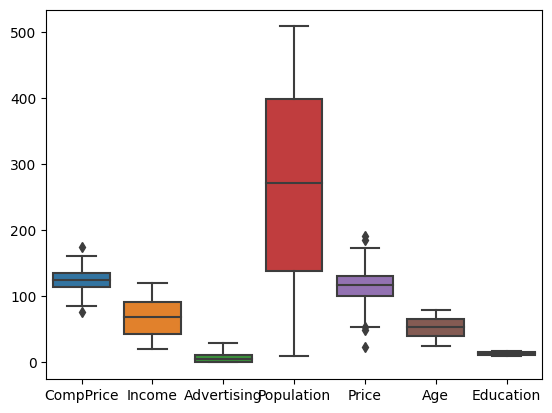

In [4]:
# Visualize the dataset using a boxplot
import seaborn as sns
sns.boxplot(data=df)

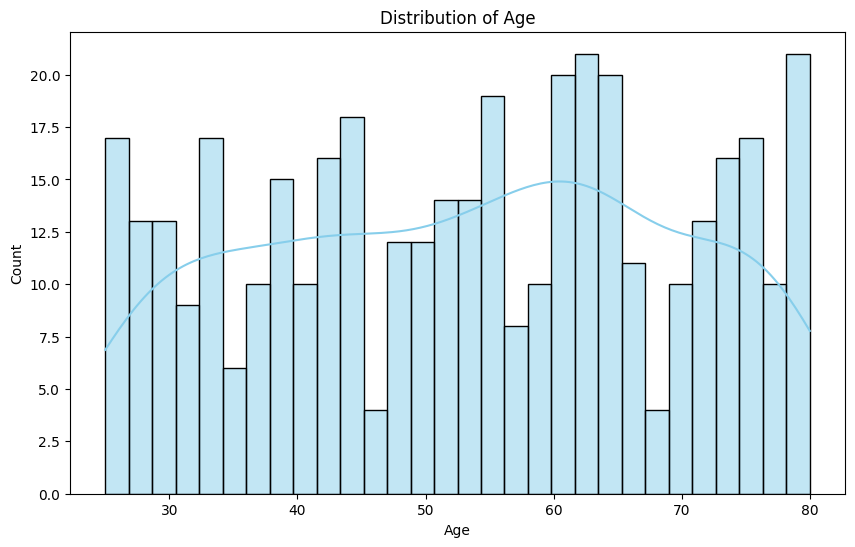

In [5]:
# Histogram of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1800\4137570652.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


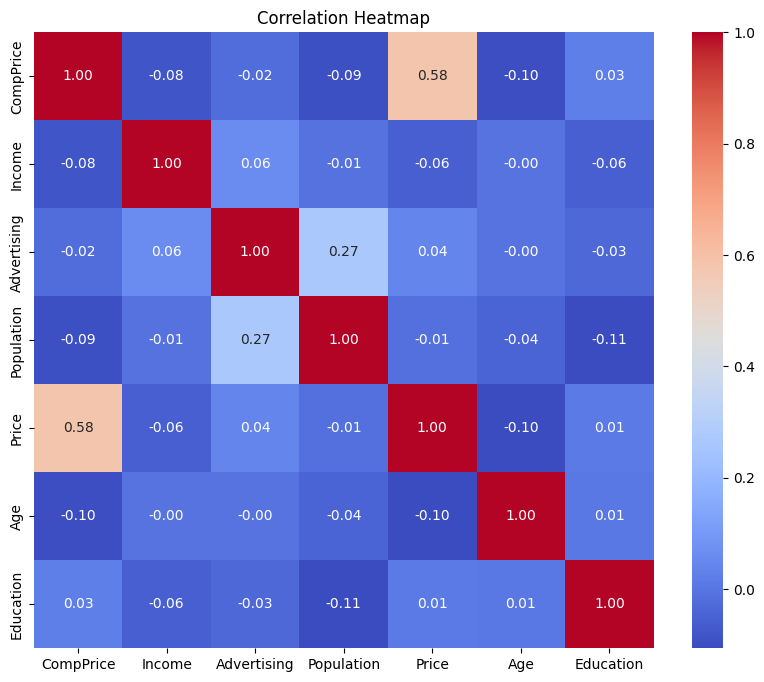

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
X = df.iloc[:,1:]

In [8]:
# Identify the outliers using the boxplot
import numpy as np
q1 = np.percentile(df['CompPrice'], 25)
q3 = np.percentile(df['CompPrice'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df['CompPrice'] < lower_bound) | (df['CompPrice'] > upper_bound)]

# Remove the outliers from the dataset
df = df[(df['CompPrice'] >= lower_bound) & (df['CompPrice'] <= upper_bound)]

In [9]:
# Identify the outliers using the boxplot
q1 = np.percentile(df['Price'], 25)
q3 = np.percentile(df['Price'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Remove the outliers from the dataset
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

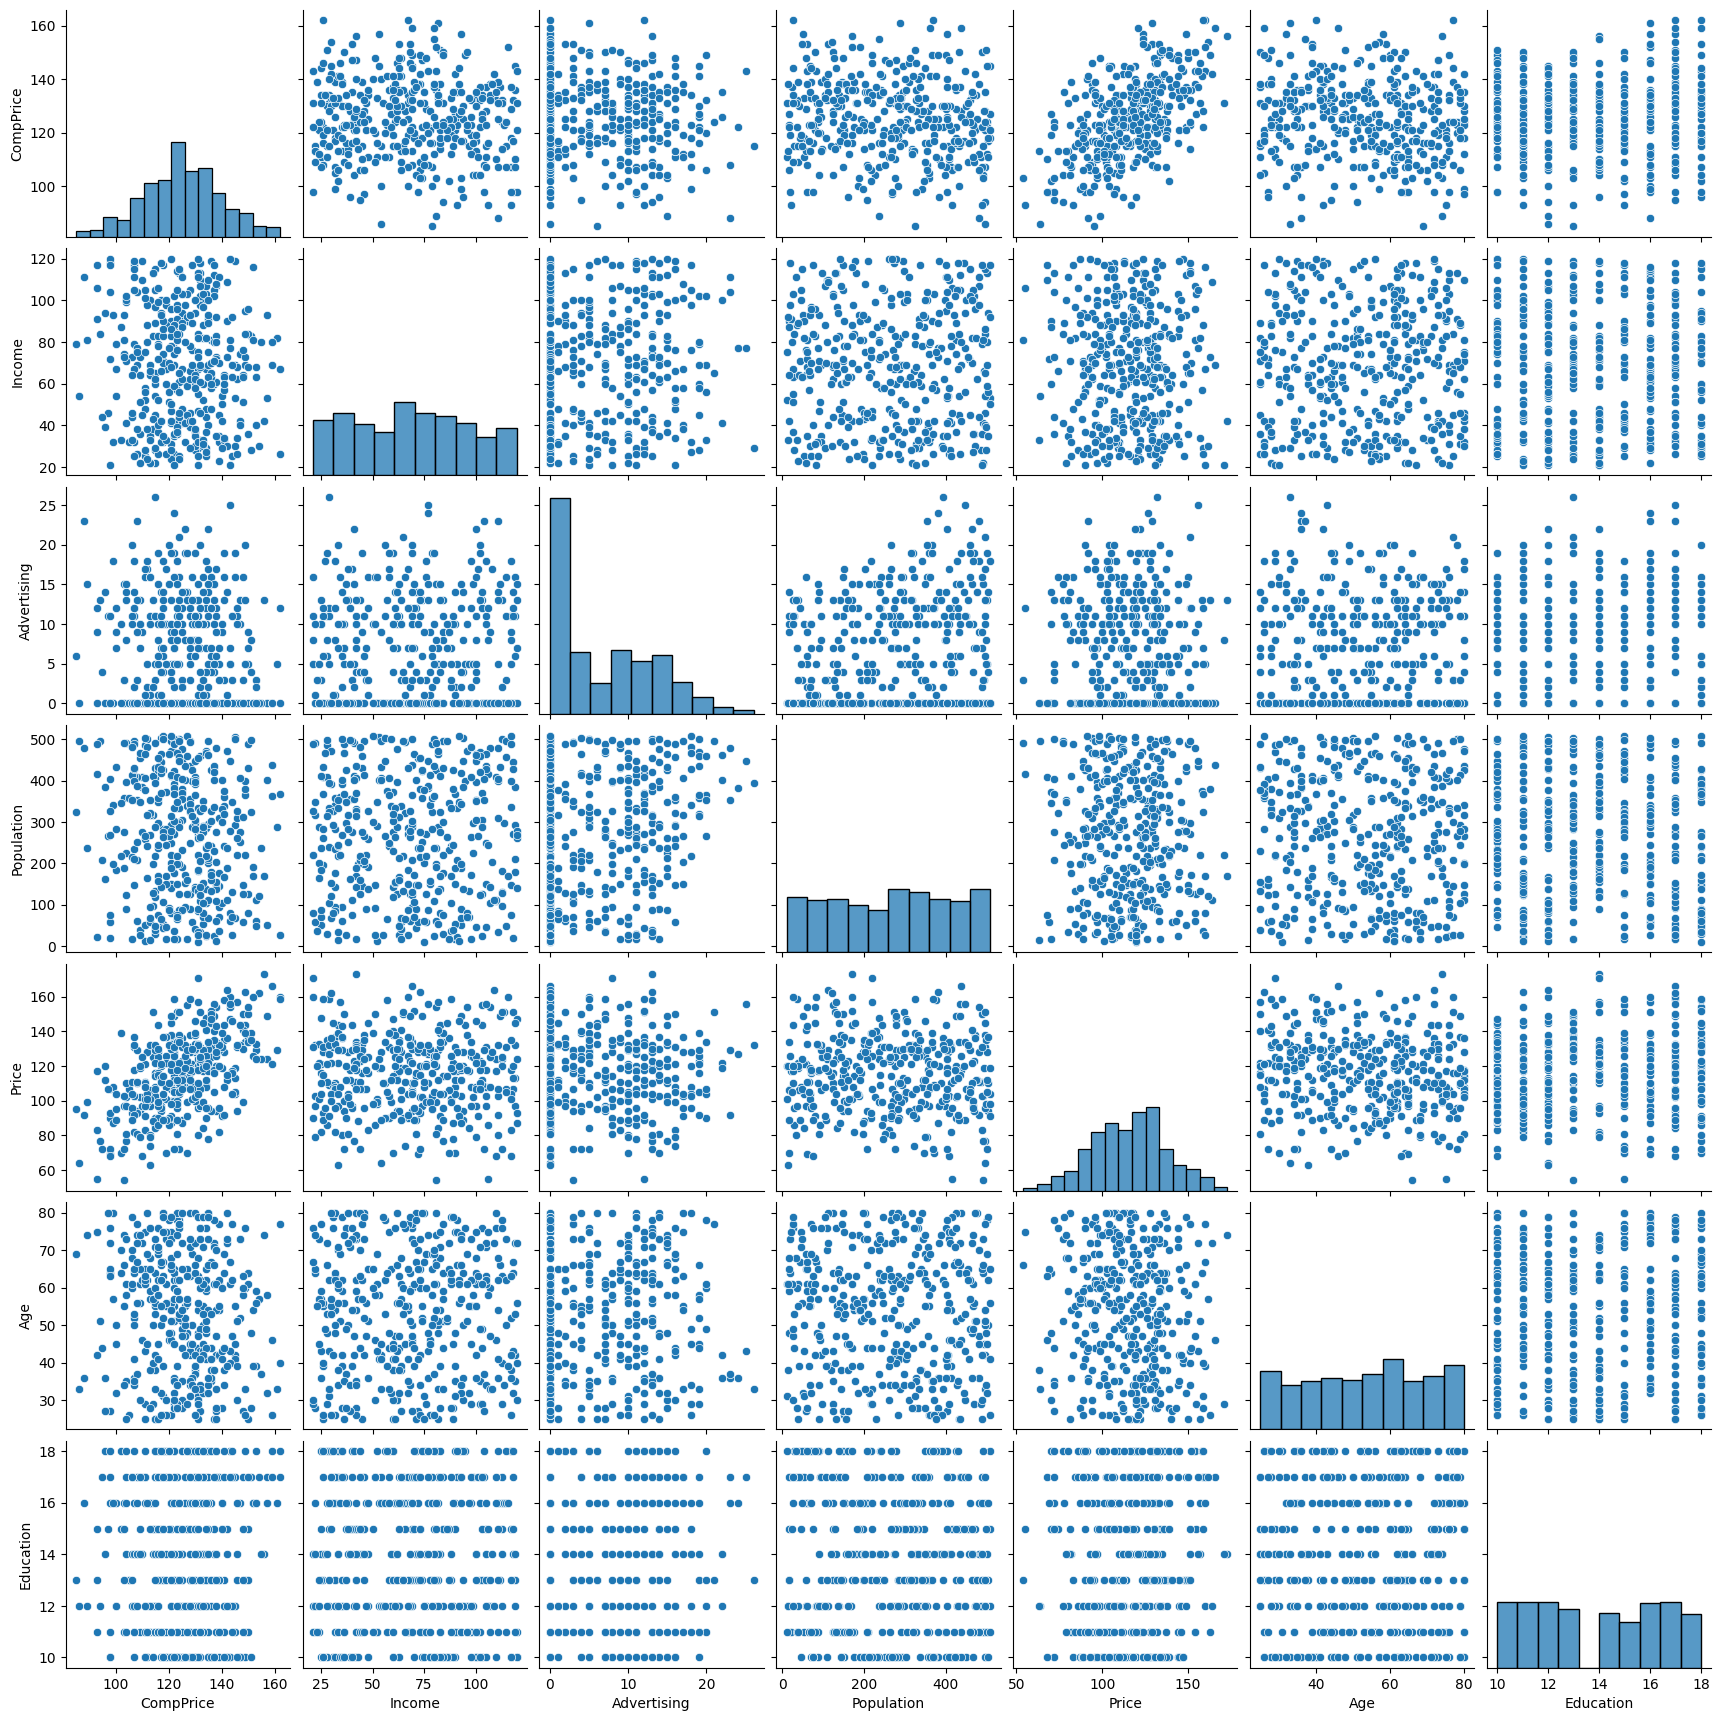

In [10]:
import seaborn as sns
sns.pairplot(df)


In [11]:
#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"] = LE.fit_transform(df["Urban"])
df["US"] = LE.fit_transform(df["US"])
df["Sales"] = LE.fit_transform(df["Sales"])

In [12]:
X = df.iloc[:,1:]
Y = df["Sales"]
Y

0      2
1      3
2      2
3      4
4      1
      ..
395    3
396    4
397    4
398    4
399    2
Name: Sales, Length: 394, dtype: int32

In [17]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values if any
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Encode categorical variables
label_encoder = LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
# Repeat for other categorical variables if any

# Split the data into features (X) and target variable (y)
X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']


In [18]:
# Initialize random forest classifiers with class weights
rf_entropy = RandomForestClassifier(criterion='entropy', class_weight='balanced')
rf_gini = RandomForestClassifier(criterion='gini', class_weight='balanced')

In [19]:
# Initialize random forest classifiers with tuned hyperparameters
rf_entropy = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=10, min_samples_split=2)
rf_gini = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10, min_samples_split=2)

In [21]:
# Fit the models
rf_entropy.fit(X_train, y_train)
rf_gini.fit(X_train, y_train)

# Make predictions
y_pred_entropy = rf_entropy.predict(X_test)
y_pred_gini = rf_gini.predict(X_test)

# Calculate accuracies
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("Accuracy with Entropy criterion:", accuracy_entropy)
print("Accuracy with Gini criterion:", accuracy_gini)

Accuracy with Entropy criterion: 0.0
Accuracy with Gini criterion: 0.0


In [11]:
# step5: Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state = 67)


In [12]:
from sklearn.ensemble import RandomForestClassifier
RFcls = RandomForestClassifier(max_features=0.3, max_samples=0.6, n_estimators = 100, random_state=4,max_depth=7)
RFcls.fit(X_train,Y_train)
Y_Pred_train = RFcls.predict(X_train)
Y_Pred_test = RFcls.predict(X_test)


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

ac_train = accuracy_score(Y_train, Y_Pred_train)
print("Accuracy Score train =", round(ac_train, 3))

ac_test = accuracy_score(Y_test, Y_Pred_test)
print("Accuracy Score test =", round(ac_test, 3))


Accuracy Score train = 0.971
Accuracy Score test = 0.58
